# Prediction March Madness

## Import Libs

In [1]:
import pandas as pd #dataframes
import matplotlib.pyplot as plt 
import numpy as np # n-dim object support
# do ploting inline instead of in a separate window
%matplotlib inline
import random

## Load and review data

In [2]:
df_team = pd.read_csv("data/team_yearly_stats.csv")
df_ps_game = pd.read_csv("data/post_season_games.csv")

In [3]:
df_ps_game.shape

(692, 7)

In [4]:
df_team.shape

(4574, 21)

In [5]:
df_team.head(5)

,year,team_name,fg_pg,ft_pg,three_pt_pg,orb_pg,drb_pg,ast_pg,stl_pg,blk_pg,...,pf_pg,pt_pg,opnt_pt_pg,fg_pct,three_p_pct,ft_pct,wl_pct,conf_wl_pct,srs,sos
0,2011.0,Air Force,22.562500,13.062500,6.625000,5.843750,28.504883,15.437500,6.250000,2.593750,...,17.593750,64.812500,65.062500,0.471,0.377,0.705,0.500,0.375000,2.71,3.31
1,2011.0,Akron,24.777778,12.694444,7.861111,10.083333,34.108796,14.444444,6.666667,3.583333,...,19.222222,70.111111,65.694444,0.430,0.361,0.704,0.639,0.562500,2.15,-1.02
2,2011.0,Alabama A&M,22.607143,14.892857,4.464286,12.392857,37.343112,12.107143,8.321429,5.392857,...,20.071429,64.571429,66.785714,0.396,0.288,0.624,0.464,0.555556,-15.19,-11.75
3,2011.0,Alabama-Birmingham,24.387097,11.870968,7.709677,11.354839,35.407908,13.548387,5.290323,3.129032,...,16.580645,68.354839,62.580645,0.438,0.342,0.717,0.710,0.750000,8.55,2.78
4,2011.0,Alabama State,20.800000,15.000000,4.714286,13.142857,35.938776,11.542857,7.285714,4.657143,...,22.200000,61.314286,63.828571,0.395,0.283,0.603,0.486,0.611111,-13.37,-10.31


In [6]:
df_ps_game.head(5)

,year,team_1_name,team_1_score,team_1_seed,team_2_name,team_2_score,team_2_seed
0,2011,UTSA,46.0,16.0,Ohio State,75.0,1.0
1,2011,Villanova,57.0,9.0,George Mason,61.0,8.0
2,2011,Clemson,76.0,12.0,West Virginia,84.0,5.0
3,2011,Princeton,57.0,13.0,Kentucky,59.0,4.0
4,2011,Xavier,55.0,6.0,Marquette,66.0,11.0


## Check for nulls

In [7]:
df_team.isnull().values.any()

False

In [8]:
df_ps_game.isnull().values.any()

False

## How to query the dataframes for specific column values

In [9]:
df_team[(df_team['year'] == 2011) & (df_team['team_name'] == "Air Force")]

,year,team_name,fg_pg,ft_pg,three_pt_pg,orb_pg,drb_pg,ast_pg,stl_pg,blk_pg,...,pf_pg,pt_pg,opnt_pt_pg,fg_pct,three_p_pct,ft_pct,wl_pct,conf_wl_pct,srs,sos
0,2011.0,Air Force,22.5625,13.0625,6.625,5.84375,28.504883,15.4375,6.25,2.59375,...,17.59375,64.8125,65.0625,0.471,0.377,0.705,0.5,0.375,2.71,3.31


## Get team stats for post-season games

In [10]:
import shared
ps_team_stats_df = shared.get_team_stats_df(df_team, df_ps_game, True)

2011
LIU
2011
UNC Asheville
2012
UNC Asheville
2012
LIU
2012
Long Beach State
2012
NC State
2012
NC State
2012
NC State
2013
NC State
2013
California
2013
California
2014
NC State
2015
NC State
2015
NC State
2015
NC State
2016
UNC Wilmington
2016
California
2016
UNC Asheville
2017
UNC Wilmington
2018
Penn
2018
NC State
2018
TCU
2018
UMBC
2018
UMBC


In [11]:
ps_team_stats_df.head(5)

,team_name_1,fg_pg_1,ft_pg_1,three_pt_pg_1,orb_pg_1,drb_pg_1,ast_pg_1,stl_pg_1,blk_pg_1,tov_pg_1,...,pt_pg_2,opnt_pt_pg_2,fg_pct_2,three_p_pct_2,ft_pct_2,wl_pct_2,conf_wl_pct_2,srs_2,sos_2,t1_win
0,Texas-San Antonio,23.588235,16.058824,6.882353,10.647059,34.569204,12.647059,7.058824,2.235294,13.558824,...,77.135135,59.675676,0.494,0.423,0.701,0.919,0.888889,25.84,8.38,False
1,Villanova,24.121212,17.636364,6.363636,12.181818,36.691460,13.636364,6.303030,3.787879,11.878788,...,72.764706,62.470588,0.471,0.395,0.689,0.794,0.888889,11.66,1.37,False
2,Clemson,23.823529,14.500000,6.382353,11.294118,34.285467,13.088235,8.000000,4.735294,13.205882,...,69.787879,64.666667,0.429,0.337,0.711,0.636,0.611111,16.15,11.03,False
3,Princeton,24.625000,13.937500,6.031250,9.843750,34.223633,13.343750,5.968750,4.187500,12.156250,...,74.868421,63.473684,0.459,0.397,0.710,0.763,0.625000,20.30,8.91,False
4,Xavier,24.500000,17.656250,5.406250,10.250000,34.992188,13.250000,5.437500,3.062500,12.062500,...,75.189189,68.810811,0.465,0.349,0.696,0.595,0.500000,14.89,8.51,False


## Concat the team stats with the post-season game data

In [12]:
ps_game_w_team_stats = pd.concat([df_ps_game, ps_team_stats_df], axis=1, join='inner')

In [13]:
ps_game_w_team_stats.head(3)

,year,team_1_name,team_1_score,team_1_seed,team_2_name,team_2_score,team_2_seed,team_name_1,fg_pg_1,ft_pg_1,...,pt_pg_2,opnt_pt_pg_2,fg_pct_2,three_p_pct_2,ft_pct_2,wl_pct_2,conf_wl_pct_2,srs_2,sos_2,t1_win
0,2011,UTSA,46.0,16.0,Ohio State,75.0,1.0,Texas-San Antonio,23.588235,16.058824,...,77.135135,59.675676,0.494,0.423,0.701,0.919,0.888889,25.84,8.38,False
1,2011,Villanova,57.0,9.0,George Mason,61.0,8.0,Villanova,24.121212,17.636364,...,72.764706,62.470588,0.471,0.395,0.689,0.794,0.888889,11.66,1.37,False
2,2011,Clemson,76.0,12.0,West Virginia,84.0,5.0,Clemson,23.823529,14.500000,...,69.787879,64.666667,0.429,0.337,0.711,0.636,0.611111,16.15,11.03,False


In [14]:

ps_game_w_team_stats.shape

(668, 48)

## Check true/false ratio for team 1 win

In [15]:
t1_win_map = {True:1, False:0}
ps_game_w_team_stats['t1_win'] = ps_game_w_team_stats['t1_win'].map(t1_win_map)
num_true = len(ps_game_w_team_stats.loc[ps_game_w_team_stats['t1_win'] == True])
num_false = len(ps_game_w_team_stats.loc[ps_game_w_team_stats['t1_win'] == False])
print("Number of True cases: {0} ({1:2.2f}%)".format(num_true, (num_true/(num_true+num_false))*100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/(num_true+num_false))*100))

Number of True cases: 326 (48.80%)
Number of False cases: 342 (51.20%)


## Setup training, validation, and testing splits

In [16]:
import sklearn.model_selection

ps_predict_class_names = ['t1_win']
ps_x = ps_game_w_team_stats[shared.ps_feature_col_names].values
ps_y = ps_game_w_team_stats[shared.ps_predict_class_names].values
split_test_size = 0.30

ps_x_train, ps_x_test, ps_y_train, ps_y_test = sklearn.model_selection.train_test_split(ps_x, ps_y, test_size=split_test_size, random_state=42)

In [17]:
print("{0:0.2f}% in training set".format((len(ps_x_train)/len(ps_game_w_team_stats.index))*100))
print("{0:0.2f}% in test set".format((len(ps_x_test)/len(ps_game_w_team_stats.index))*100))

69.91% in training set
30.09% in test set


## Imput with the mean

In [18]:
import sklearn.impute

#Impute with mean all 0 readings
fill_0 = sklearn.impute.SimpleImputer(missing_values=0, strategy="mean")

ps_x_train = fill_0.fit_transform(ps_x_train)
ps_x_test = fill_0.fit_transform(ps_x_test)

# TODO : impute incorrect negative values such anything other than (SOS and SRS

## Training Baive Bayes mode

In [19]:
from sklearn.naive_bayes import GaussianNB

ps_nb_model = GaussianNB()
ps_nb_model.fit(ps_x_train, ps_y_train.ravel())

GaussianNB()

### Perfrormance on Testing Data

In [20]:

ps_nb_predict_test = ps_nb_model.predict(ps_x_test)
from sklearn import metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(ps_y_test, ps_nb_predict_test)))

Accuracy: 0.7015


In [21]:
print("Ps - Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(ps_y_test, ps_nb_predict_test, labels=[1, 0])))
print("")

print("PS -Classification Report")
print(metrics.classification_report(ps_y_test, ps_nb_predict_test, labels=[1, 0]))

Ps - Confusion Matrix
[[68 25]
 [35 73]]

PS -Classification Report
              precision    recall  f1-score   support

           1       0.66      0.73      0.69        93
           0       0.74      0.68      0.71       108

    accuracy                           0.70       201
   macro avg       0.70      0.70      0.70       201
weighted avg       0.71      0.70      0.70       201



## Random Forsest

In [22]:
from sklearn.ensemble import RandomForestClassifier
ps_rf_model = RandomForestClassifier(random_state=42)
ps_rf_model.fit(ps_x_train, ps_y_train.ravel())

RandomForestClassifier(random_state=42)

In [23]:
ps_rf_predict_test = ps_rf_model.predict(ps_x_test)
from sklearn import metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(ps_y_test, ps_rf_predict_test))) # Will be low because of over-fitting

Accuracy: 0.7214


## Logistic Regression

/Users/npurcell/Library/Caches/pypoetry/virtualenvs/machinelearningmarchmadness--RyBdK5r-py3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/npurcell/Library/Caches/pypoetry/virtualenvs/machinelearningmarchmadness--RyBdK5r-py3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.htm

/Users/npurcell/Library/Caches/pypoetry/virtualenvs/machinelearningmarchmadness--RyBdK5r-py3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/npurcell/Library/Caches/pypoetry/virtualenvs/machinelearningmarchmadness--RyBdK5r-py3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.htm

/Users/npurcell/Library/Caches/pypoetry/virtualenvs/machinelearningmarchmadness--RyBdK5r-py3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/npurcell/Library/Caches/pypoetry/virtualenvs/machinelearningmarchmadness--RyBdK5r-py3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.htm

1st max valu of 0.774 occured at C=0.100


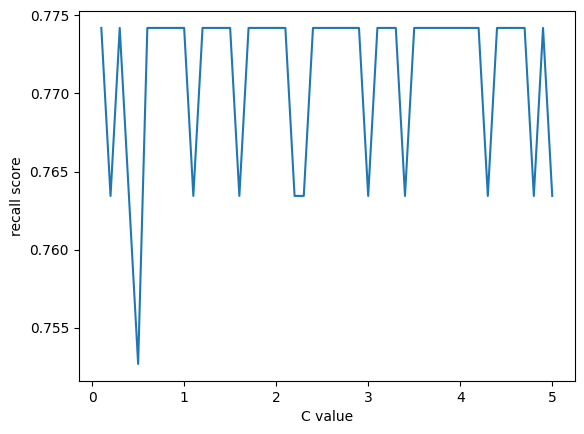

In [24]:
from sklearn.linear_model import LogisticRegression
# Setting up regularization Params
def get_best_score_C_val_for_LR(x_tr, y_tr, x_tst, y_tst):
    C_start = 0.1
    C_end = 5
    C_inc = 0.1
    C_values, recall_scores = [], []
    C_val = C_start
    best_recall_score = 0

    while (C_val < C_end):
        C_values.append(C_val)
        lr_model_loop = LogisticRegression(C=C_val, random_state=42)
        lr_model_loop.fit(x_tr, y_tr.ravel())
        lr_predict_loop_test = lr_model_loop.predict(x_tst)
        recall_score = metrics.recall_score(y_tst, lr_predict_loop_test)
        recall_scores.append(recall_score)
        if (recall_score > best_recall_score):
            best_recall_score = recall_score
            best_lr_predict_test = lr_predict_loop_test
        C_val = C_val + C_inc
    best_score_C_val = C_values[recall_scores.index(best_recall_score)]
    print("1st max valu of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))
    %matplotlib inline
    plt.plot(C_values, recall_scores, "-")
    plt.xlabel("C value")
    plt.ylabel("recall score")
    return best_score_C_val
ps_best_score_C_val = get_best_score_C_val_for_LR(ps_x_train, ps_y_train, ps_x_test, ps_y_test)

In [25]:

ps_lr_model = LogisticRegression(class_weight="balanced", C=ps_best_score_C_val, random_state=42)
ps_lr_model.fit(ps_x_train, ps_y_train.ravel())


/Users/npurcell/Library/Caches/pypoetry/virtualenvs/machinelearningmarchmadness--RyBdK5r-py3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1, class_weight='balanced', random_state=42)

In [26]:
ps_lr_predict_test = ps_lr_model.predict(ps_x_test)
print("Accuracy: {0:.4f}",format(metrics.accuracy_score(ps_y_test, ps_lr_predict_test)))

Accuracy: {0:.4f} 0.7263681592039801


## Logistic Regression with Cross Validation

In [27]:
from sklearn.linear_model import LogisticRegressionCV
ps_lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=True, class_weight="balanced") #Set number of folds
ps_lr_cv_model.fit(ps_x_train, ps_y_train.ravel())


/Users/npurcell/Library/Caches/pypoetry/virtualenvs/machinelearningmarchmadness--RyBdK5r-py3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/npurcell/Library/Caches/pypoetry/virtualenvs/machinelearningmarchmadness--RyBdK5r-py3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.htm

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, n_jobs=-1,
                     random_state=42)

In [28]:
ps_lr_cv_predict_test = ps_lr_cv_model.predict(ps_x_test)
print("Accuracy: {0:.4f}",format(metrics.accuracy_score(ps_y_test, ps_lr_cv_predict_test)))

Accuracy: {0:.4f} 0.7313432835820896


# We have trained our models, not experiment with them to produce your bracket!

In [29]:
# Setup This years bracket regions
# TODO: automate this with the data received from the scraper from https://www.sports-reference.com/cbb/postseason/2021-ncaa.html
# Note: we are ignoring some of the play in teams since 16 seeds are not frequent upset candidates
team_names_south = [
    # south region
    ('Alabama', 1),('Hartford', 16),
    ('Maryland', 8), ('West Virginia', 9),
    ('San Diego State',5), ('Charleston Southern', 12),
    ('Virginia',4), ('Furman', 13),
    ('Creighton', 6), ("NC State", 11),
    ('Baylor',3), ('UC Santa Barbara',14),
    ('Missouri',7),('Utah State',10),
    ('Arizona',2), ('Princeton',15)
]
team_names_west = [
    # west region
    ('Kansas', 1),('Howard',16),
    ('Arkansas',8), ('Illinois',9),
    ("Saint Mary's (CA)",5), ('VCU',12),
    ('Connecticut',4), ('Iona',13),
    ('TCU',6), ('Arizona State',11),
    ('Gonzaga',3), ('Grand Canyon',14),
    ('Northwestern',7), ('Boise State',10),
    ('UCLA', 2), ("UNC Asheville",15)

]
team_names_east = [
    # east region
    ('Purdue',1),('Texas Southern',16), 
    ('Memphis', 8),('Florida Atlantic', 9),
    ('Duke',5), ('Oral Roberts', 12),
    ('Tennessee',4), ('Louisiana',13),
    ('Kentucky',6),('Providence',11), 
    ('Kansas State', 3),('Montana State', 14),
    ('Michigan State',7),('USC',10),
    ('Marquette',2),('Vermont',15)
]
team_names_midwest = [
    # mid-west region
    ('Houston', 1),('Northern Kentucky', 16),
    ('Iowa', 8), ('Auburn', 9),
    ('Miami (FL)',5), ('Drake', 12),
    ('Indiana',4), ('Kent State', 13),
    ('Iowa State', 6), ('Mississippi State', 11),
    ('Xavier',3), ('Kennesaw State',14),
    ('Texas A&M',7),('Penn State',10),
    ('Texas',2), ('Colgate',15)
]



In [35]:
'''
    Methods to add evaluating the predicted winners of matchups and subbrackets (A region or Final Four)
    To change the predictive model used, just change the model handed to "evaluate_winner(teams,sub_bracket_name, model)"
    found later in the notebook
'''
def get_matchup_winners(matchup_stats, teams, model, post_season):
    if(post_season):
        x_tourney = matchup_stats[shared.ps_feature_col_names].values
    else:
        x_tourney = matchup_stats[shared.feature_col_names].values
    y_tourney = model.predict(x_tourney)
    i = 0
    winners = []
    for y_val in y_tourney:
        t1_name, t1_seed = teams[i]
        t2_name, t2_seed = teams[i + 1]
        print(t1_name,t1_seed,' vs. ', t2_name,t2_seed,'(team 1 won=', y_val,')')
        if(y_val):
            winners.append((t1_name,t1_seed))
        else:
            winners.append((t2_name, t2_seed))
        i = i + 2
    return winners

def evaluate_winner(teams,sub_bracket_name, model):
    print('Evaluating Winner of ',sub_bracket_name)
    remaining_teams = teams
    i = 1
    while(len(remaining_teams) > 1):
        post_season_stats = True
        print("---",sub_bracket_name," round ",i,"---")
        matchup_stats = shared.get_matchups_stats(df_team, remaining_teams, post_season_stats, 2023)
        # TODO: the 2023 should not be a magic number
        remaining_teams = get_matchup_winners(matchup_stats,remaining_teams, model, post_season_stats)
        i = i + 1
    winner = remaining_teams[0]
    print('Winner of ',sub_bracket_name,':',winner)
    print('=================================')
    return winner

def evaluate_tournament(model):
    # Get predicted final four
    final_four = [
        evaluate_winner(team_names_south, "South", model), 
        evaluate_winner(team_names_east, "East", model),
        evaluate_winner(team_names_midwest, "MidWest", model),
        evaluate_winner(team_names_west,"West", model),
    ]
    print('================================')
    champ = evaluate_winner(final_four, "FinalFour", model)
    print('========= Bracket Winner =========')
    print(champ)

## Post Season Trained Logistic Regression Model results


In [36]:
evaluate_tournament(ps_lr_model) # bot 1


Evaluating Winner of  South
--- South  round  1 ---
Alabama 1  vs.  Hartford 16 (team 1 won= 1 )
Maryland 8  vs.  West Virginia 9 (team 1 won= 1 )
San Diego State 5  vs.  Charleston Southern 12 (team 1 won= 1 )
Virginia 4  vs.  Furman 13 (team 1 won= 1 )
Creighton 6  vs.  NC State 11 (team 1 won= 1 )
Baylor 3  vs.  UC Santa Barbara 14 (team 1 won= 1 )
Missouri 7  vs.  Utah State 10 (team 1 won= 1 )
Arizona 2  vs.  Princeton 15 (team 1 won= 1 )
--- South  round  2 ---
Alabama 1  vs.  Maryland 8 (team 1 won= 0 )
San Diego State 5  vs.  Virginia 4 (team 1 won= 1 )
Creighton 6  vs.  Baylor 3 (team 1 won= 1 )
Missouri 7  vs.  Arizona 2 (team 1 won= 0 )
--- South  round  3 ---
Maryland 8  vs.  San Diego State 5 (team 1 won= 1 )
Creighton 6  vs.  Arizona 2 (team 1 won= 0 )
--- South  round  4 ---
Maryland 8  vs.  Arizona 2 (team 1 won= 1 )
Winner of  South : ('Maryland', 8)
Evaluating Winner of  East
--- East  round  1 ---
Purdue 1  vs.  Texas Southern 16 (team 1 won= 1 )
Memphis 8  vs.  Flor

## Post Season Naive Baesean Model Results

In [32]:
evaluate_tournament(ps_nb_model) # bot 2

Evaluating Winner of  East
--- East  round  1 ---
Purdue 1  vs.  Texas Southern 16 (team 1 won= 1 )
Memphis 8  vs.  Florida Atlantic 9 (team 1 won= 1 )
Duke 5  vs.  Oral Roberts 12 (team 1 won= 1 )
Tennessee 4  vs.  Louisiana 13 (team 1 won= 1 )
Kentucky 6  vs.  Providence 11 (team 1 won= 1 )
Kansas State 3  vs.  Montana State 14 (team 1 won= 1 )
Michigan State 7  vs.  USC 10 (team 1 won= 1 )
Marquette 2  vs.  Vermont 15 (team 1 won= 1 )
--- East  round  2 ---
Purdue 1  vs.  Memphis 8 (team 1 won= 1 )
Duke 5  vs.  Tennessee 4 (team 1 won= 1 )
Kentucky 6  vs.  Kansas State 3 (team 1 won= 1 )
Michigan State 7  vs.  Marquette 2 (team 1 won= 0 )
--- East  round  3 ---
Purdue 1  vs.  Duke 5 (team 1 won= 1 )
Kentucky 6  vs.  Marquette 2 (team 1 won= 0 )
--- East  round  4 ---
Purdue 1  vs.  Marquette 2 (team 1 won= 0 )
Winner of  East : ('Marquette', 2)
Evaluating Winner of  West
--- West  round  1 ---
Kansas 1  vs.  Howard 16 (team 1 won= 1 )
Arkansas 8  vs.  Illinois 9 (team 1 won= 1 )
Sai

In [33]:
# post season logistic regression with cross validation
evaluate_tournament(ps_lr_cv_model) # bot 3

Evaluating Winner of  East
--- East  round  1 ---
Purdue 1  vs.  Texas Southern 16 (team 1 won= 1 )
Memphis 8  vs.  Florida Atlantic 9 (team 1 won= 1 )
Duke 5  vs.  Oral Roberts 12 (team 1 won= 1 )
Tennessee 4  vs.  Louisiana 13 (team 1 won= 1 )
Kentucky 6  vs.  Providence 11 (team 1 won= 1 )
Kansas State 3  vs.  Montana State 14 (team 1 won= 1 )
Michigan State 7  vs.  USC 10 (team 1 won= 1 )
Marquette 2  vs.  Vermont 15 (team 1 won= 1 )
--- East  round  2 ---
Purdue 1  vs.  Memphis 8 (team 1 won= 1 )
Duke 5  vs.  Tennessee 4 (team 1 won= 0 )
Kentucky 6  vs.  Kansas State 3 (team 1 won= 0 )
Michigan State 7  vs.  Marquette 2 (team 1 won= 0 )
--- East  round  3 ---
Purdue 1  vs.  Tennessee 4 (team 1 won= 0 )
Kansas State 3  vs.  Marquette 2 (team 1 won= 0 )
--- East  round  4 ---
Tennessee 4  vs.  Marquette 2 (team 1 won= 1 )
Winner of  East : ('Tennessee', 4)
Evaluating Winner of  West
--- West  round  1 ---
Kansas 1  vs.  Howard 16 (team 1 won= 1 )
Arkansas 8  vs.  Illinois 9 (team 1 